# Supervised Learning Quiz
Pick *one* of the two provided datasets to create a machine learning model. 

You must include markdowns to detail out the decisions that you’re making along the way. Your code and reasoning should back up your answers to the listed questions.

## 1. Library Imports and Data Loading

In [1]:
# TODO: Uncomment the import statements you need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("data/realestate.csv")
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           521 non-null    object 
 1   rent_or_own     521 non-null    int64  
 2   age             521 non-null    int64  
 3   gender          521 non-null    object 
 4   pets            521 non-null    bool   
 5   income          521 non-null    float64
 6   children        521 non-null    int64  
 7   city_proximity  521 non-null    float64
 8   budget          521 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 33.2+ KB


Index(['state', 'rent_or_own', 'age', 'gender', 'pets', 'income', 'children',
       'city_proximity', 'budget'],
      dtype='object')

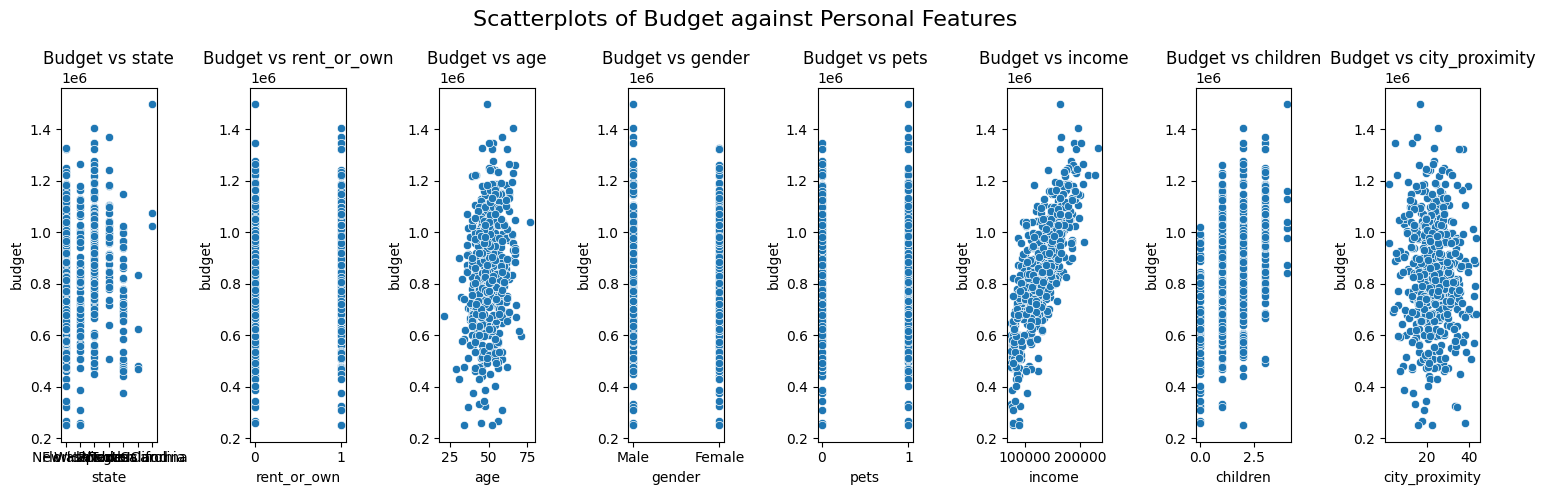

In [3]:
# Check linearity
possible_features = ['state', 'rent_or_own', 'age', 'gender', 'pets', 'income', 'children',
       'city_proximity']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)
# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=df, x=feature, y="budget", ax=axes[index])
    axes[index].set_title(f'Budget vs {feature}')

fig.suptitle("Scatterplots of Budget against Personal Features", fontsize=16)
fig.tight_layout()



## Zooming in on the graphs that display potential linear relationships

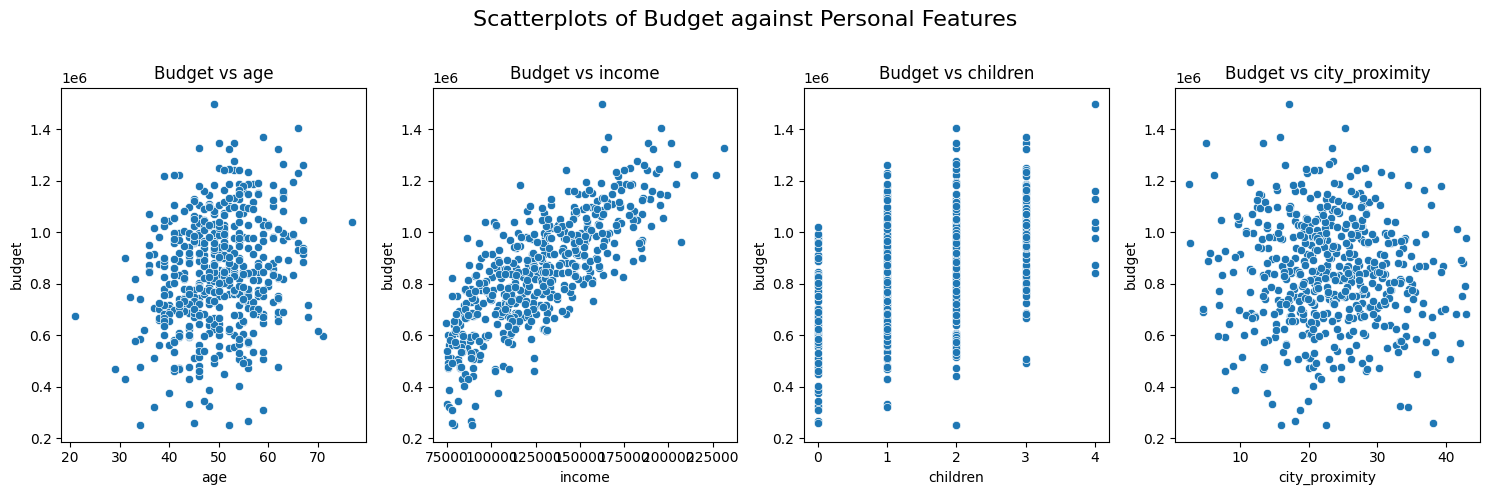

In [4]:
# Zoom in on specific feature that may show some linearity
possible_linear_features = ['age', 'income', 'children', 'city_proximity']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_linear_features), figsize=(15, 5), sharey=False)
# Loop through 
for index, feature in enumerate(possible_linear_features):
    sns.scatterplot(data=df, x=feature, y="budget", ax=axes[index])
    axes[index].set_title(f'Budget vs {feature}')

fig.suptitle("Scatterplots of Budget against Personal Features", fontsize=16)
fig.tight_layout()

## Looking closer at the states specifically to see if their are any obvious patterns

In [5]:
df["state"].value_counts()

state
Florida           212
Washington        143
New Hapshire       81
Texas              39
Rhode Island       39
North Carolina      4
California          3
Name: count, dtype: int64

<Axes: xlabel='state', ylabel='budget'>

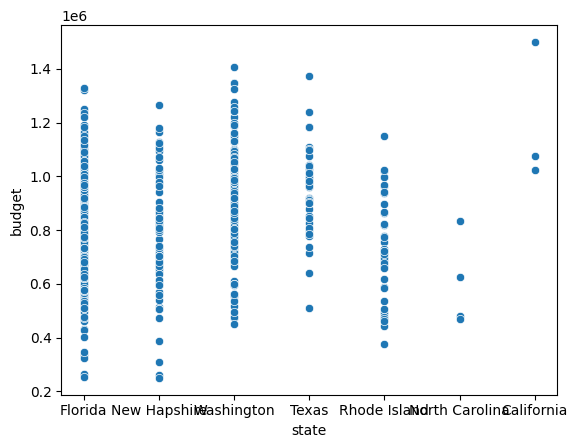

In [6]:
sns.scatterplot(data=df, x="state", y="budget")

1. What ML model did you use and why?

The age and city_proximity don't display any obvious linear pattern. Also State and Gender aren't quantitative numerical values so they shouldn't be put into the LinearRegression model. However, this model is not a classifcation model becasueb budget has a linaer relationship. That is why Logestic Regression and K Nearest neiggbhoors shouldb't be used. Their is no neighboors to classify with in this data set so KNN doesn't work. That is why I choose to use Linear Regression for my selected Machine Learning model. 

<Axes: >

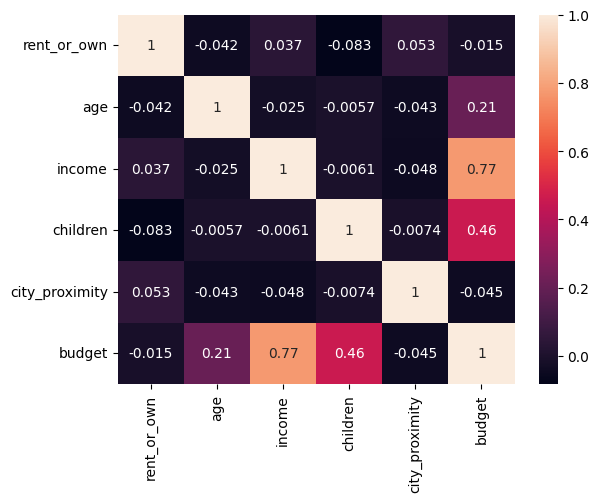

In [7]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

In [36]:
# Extract Data
X_train = df[["income", "children"]]
y_train = df["budget"]

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LinearRegression()

# Train the model 
model = model.fit(X_train, y_train)

2. Which features did you pick and why?

I choose to include the feature of income, and children in my model because income has a strong corelation to budget, and number of children has a pretyy good corelation to the budget. Their values are both above .45 and income is especially good with a value of .77 which is pretty close to 1 and correlates pretty well with the budget. Also none of the independent variables seem to correlate with each other much which is good so that we don't overfit our model.  

3. What steps did you take to evaluate your model?

In [40]:
# Make prediction onf the test data
y_pred = model.predict(X_train)
print(y_pred)

[ 629275.72624489 1093848.14958645  990363.97992521  900568.51657882
 1020380.0451128   775904.04775768  532458.24356911  815317.27191558
  864836.26344334  740022.61139396  528267.34800204  811466.42308797
  783854.94521666  715784.92776679  697349.71361484  579479.51776888
 1122414.48521814  930326.89035289  719901.77904049  952259.23081297
 1067971.0216902   839385.13097591  570427.84931785  724375.61267492
  764295.71479773  776239.69909179 1300013.79640312  805655.48363694
  678675.75779636  852954.94238988  643439.16236542  963903.06834596
  901453.94259064  953841.64835417  786050.0664912   521415.55053664
  617270.94079871 1021963.75868359  496460.57972212 1008881.16535632
  815762.023415    695188.47594564  870636.17101835 1108185.00204203
  879589.88971831  845742.50617065 1106316.82662432  765801.67145896
  897555.78885968  964615.42761487 1159597.57937969  765253.72529023
  950192.01485282  453936.15339296  946794.2944464   880248.10333173
  687523.34901767  633975.98811068

In [41]:
residuals =  y_train - y_pred

<Axes: xlabel='budget', ylabel='Count'>

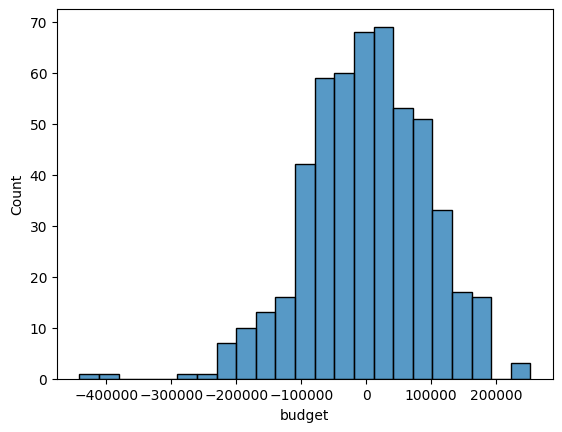

In [42]:
# Check the histogram of the residuals
sns.histplot(residuals)

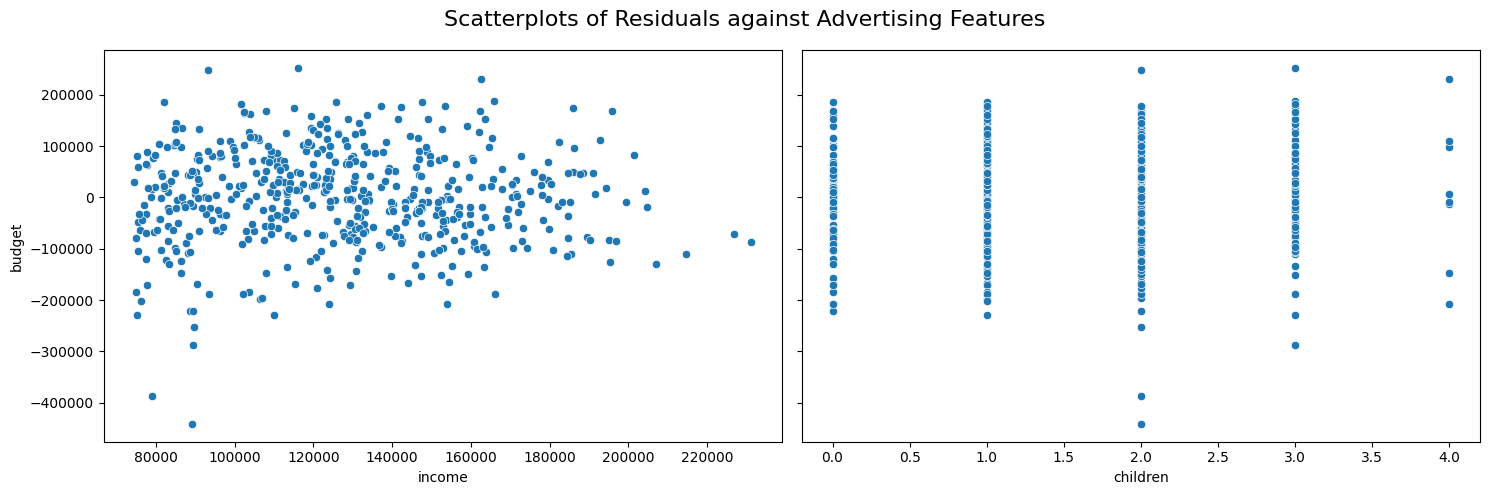

In [43]:
# Check homoscedasticity

# Create 2 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

# Plot both residuals
sns.scatterplot(data=df, x="income", y=residuals, ax=axes[0])
sns.scatterplot(data=df, x="children", y=residuals, ax=axes[1])

# Add title
fig.suptitle("Scatterplots of Residuals against Advertising Features", fontsize=16)
fig.tight_layout()

Too evaluate my model I checked the homosecsasity of the model and also disitribution of residuals in a histogram. Overall it looks pretty good with the residualas maybe being slightly skewed to the left, but overall they fit pretty good. In the graphs the residuals look pretty randomly distributed in both income and children indicating a good model. 

In [44]:
model.score(X_train, y_train)

0.8106475731109988

4. Among the following, how would you evaluate your model? Be sure to provide reasoning and code for why.
* Excellent
* Reasonable
* Just Fine
* Terrible

Overall I feel that the model is reasonable and this is due to the R^2 score being .81 which is fairly high and represents a good mode. Also the homoscadistiy or the differnet in the resididuals is pretty randomly distributed for income indicating a good model